#**Step 1:** Import necessary libraries

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-740fee5b-9222-56ea-f198-8ba5fb1dc7f3)


In [ ]:
import pandas as pd
import seaborn as sns
import sys
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import tensorflow as tf


import datetime

from sklearn import metrics

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score, classification_report, mean_squared_error, precision_recall_fscore_support

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


print( f"Python {sys.version}\n" )
print( f"NumPy {np.__version__}" )
print( f"Pandas {pd.__version__}" )
print( f"Matplotlib {matplotlib.__version__}" )
print( f"Seaborn {sns.__version__}\n" )
print(f'The scikit-learn version is {sklearn.__version__}')
print( f"TensorFlow version is {tf.__version__}\n" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )


# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )



#from sklearn.neural_network import MLPClassifier
#from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
#,RidgeClassifier, SGDClassifier
#LinearSVC, NuSVC, 
#AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, 
#from sklearn.naive_bayes import BernoulliNB, GaussianNB
# StratifiedKFold,, label_binarize, KFold, GenericUnivariateSelect, SelectPercentile,VarianceThreshold
#import sklearn.linear_model as lm
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2

The scikit-learn version is 1.0.2
TensorFlow version is 2.8.2

tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [ ]:
tf.random.set_seed(5678)

# **Step 2:** Import the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lukplamino/DADS7202_HW01_Coupon_Group/main/in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#**Step 3:** Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

##Missing values



In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%  ({})'.format(col, round(pct_missing*100),df[col].isna().sum()))


destination - 0%  (0)
passanger - 0%  (0)
weather - 0%  (0)
temperature - 0%  (0)
time - 0%  (0)
coupon - 0%  (0)
expiration - 0%  (0)
gender - 0%  (0)
age - 0%  (0)
maritalStatus - 0%  (0)
has_children - 0%  (0)
education - 0%  (0)
occupation - 0%  (0)
income - 0%  (0)
car - 99%  (12576)
Bar - 1%  (107)
CoffeeHouse - 2%  (217)
CarryAway - 1%  (151)
RestaurantLessThan20 - 1%  (130)
Restaurant20To50 - 1%  (189)
toCoupon_GEQ5min - 0%  (0)
toCoupon_GEQ15min - 0%  (0)
toCoupon_GEQ25min - 0%  (0)
direction_same - 0%  (0)
direction_opp - 0%  (0)
Y - 0%  (0)


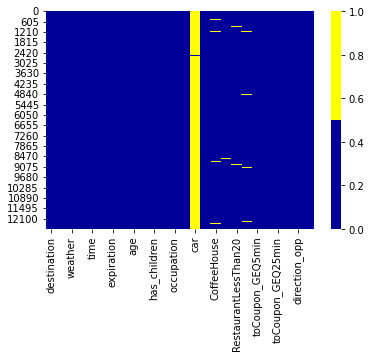

In [ ]:
cols = df.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
print(df.car.unique())

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


-----
There are 6 columns containing missing value
1.  Car
 - 99% of data in Car column is missing and the existing data in car column is not clean; consequence, we will drop this column off
 
2. Others Columns i.e. Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
 - There are missing data at only 1-2%, so we drop some rows with NULL data off
-----


In [ ]:
clean_df = df.copy()

In [ ]:
#Drop Car column
clean_df.drop(['car'], axis=1, inplace=True)

#Drop null rows
clean_df.dropna(inplace=True)

print(f'Original Dataframe Shape: {df.shape}')
print(f'Cleaned Dataframe Shape: {clean_df.shape}')
print(f'Dropped data only {((df.shape[0]-clean_df.shape[0])/df.shape[0]*100):.2f}%')

Original Dataframe Shape: (12684, 26)
Cleaned Dataframe Shape: (12079, 25)
Dropped data only 4.77%


##Imbalanced Data

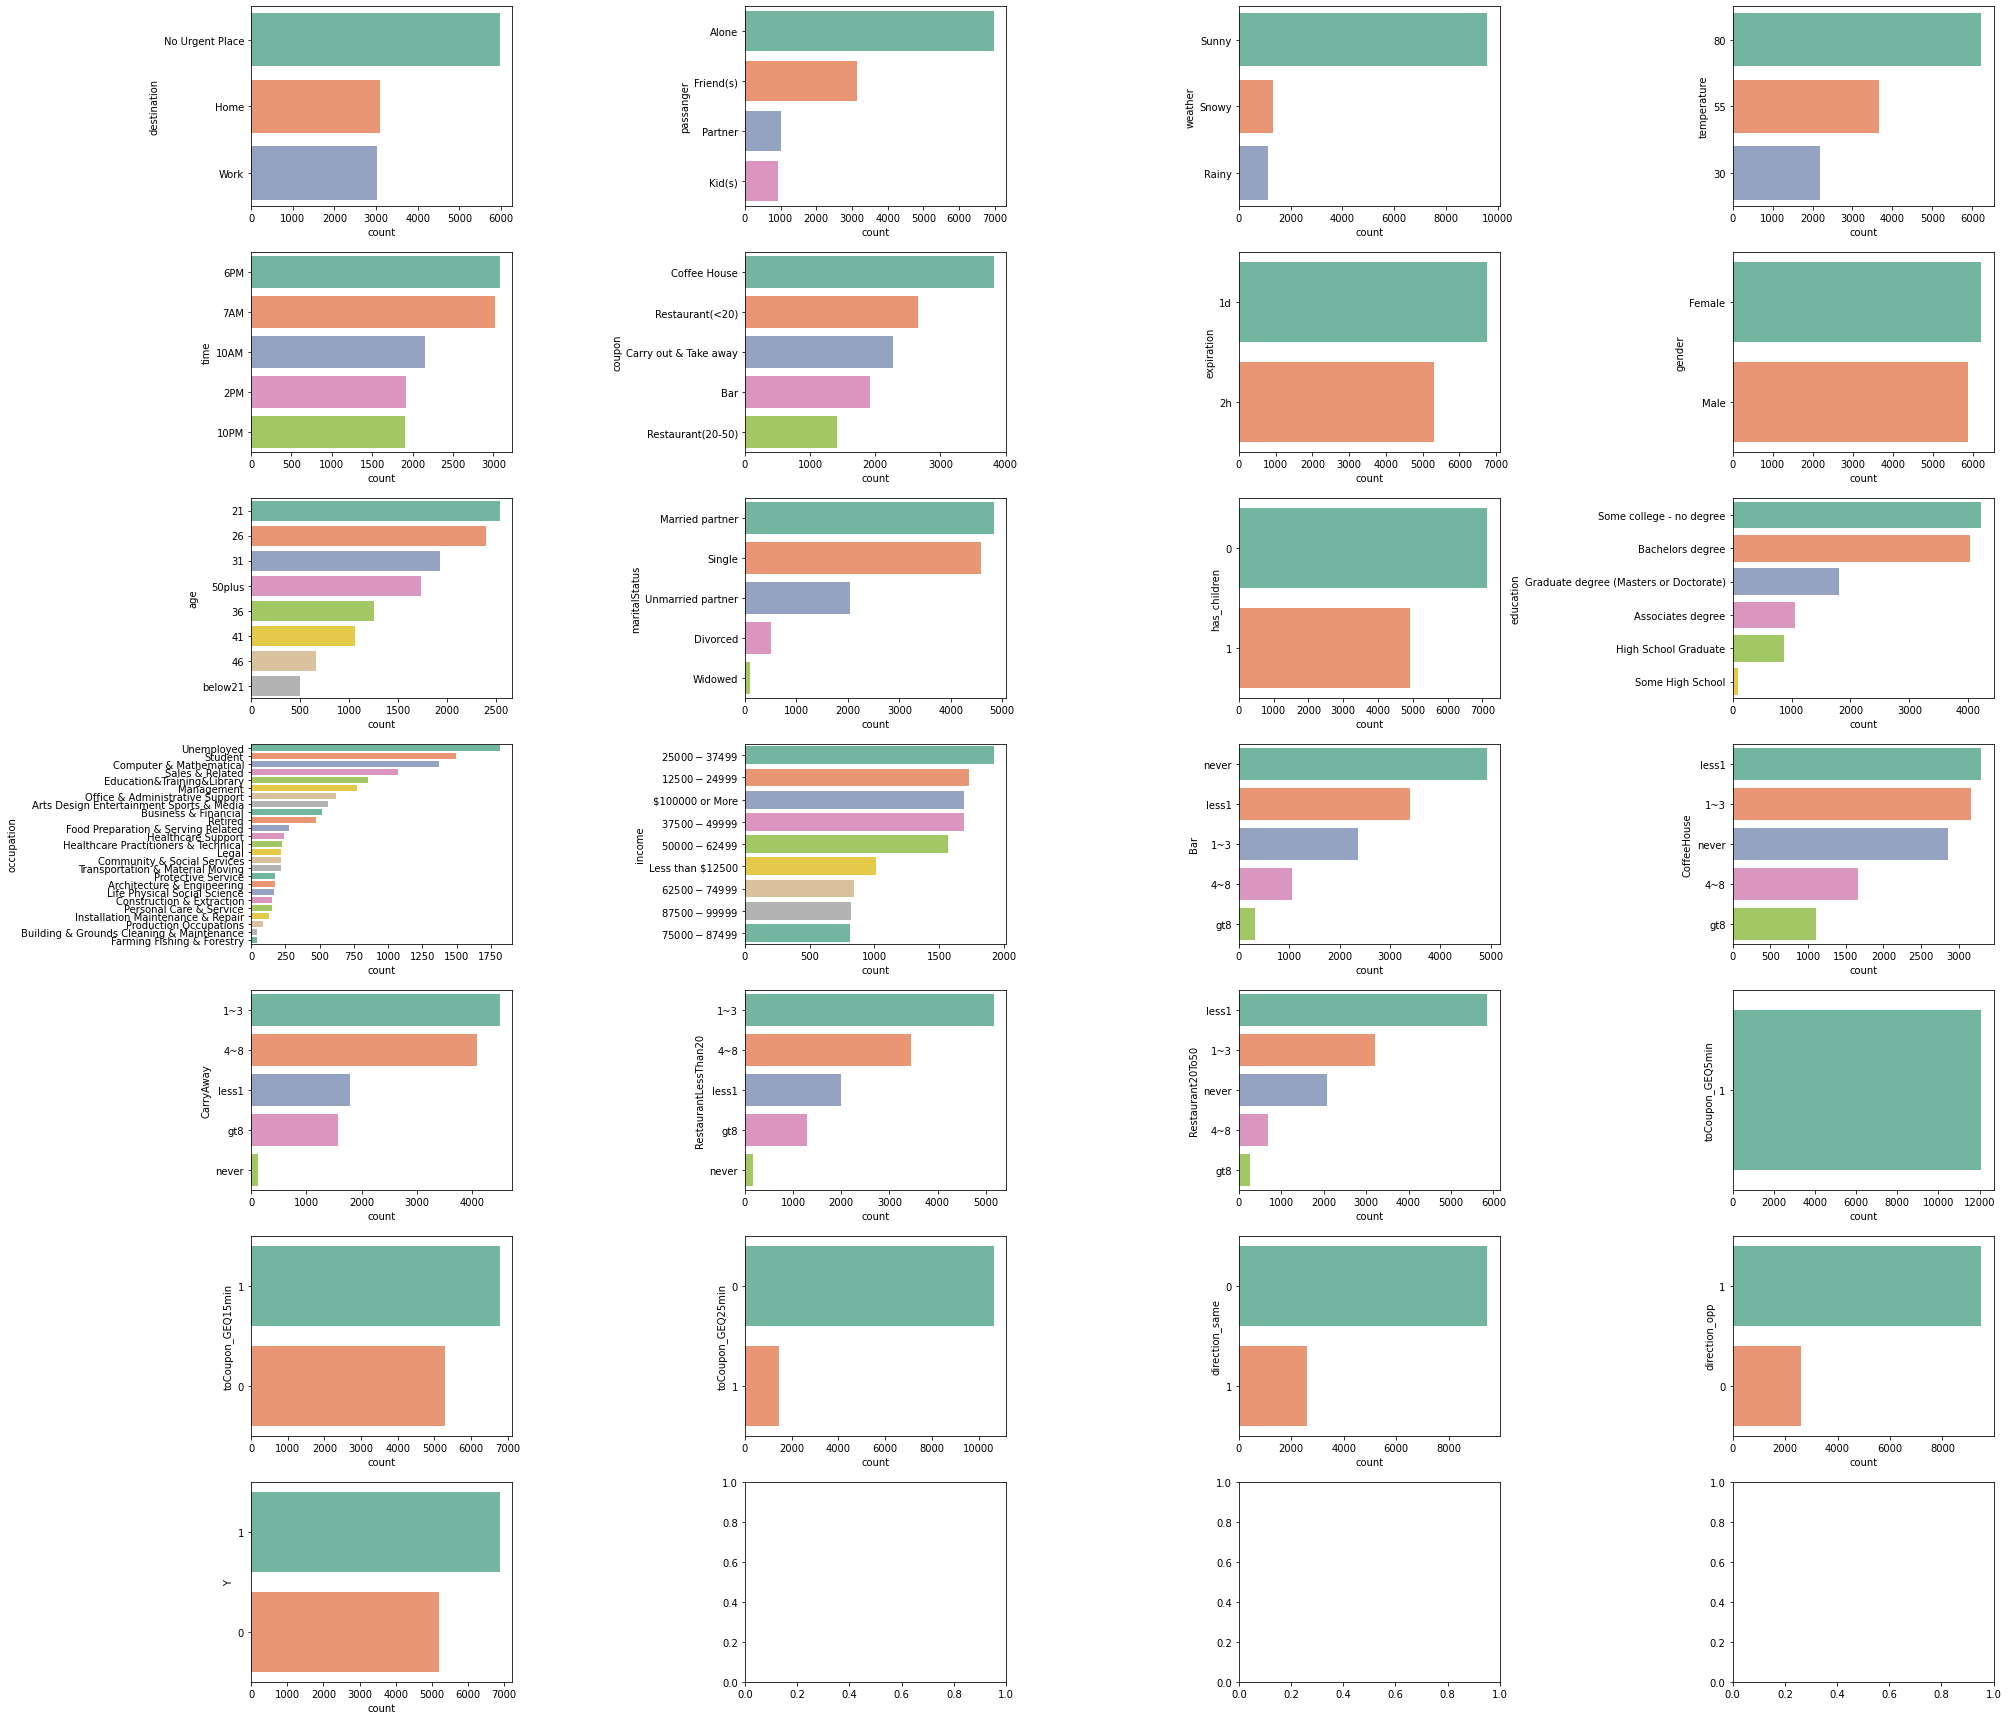

In [ ]:
fig, axes = plt.subplots(7, 4, figsize=(28,24))
axes = axes.flatten()
for ax, col in zip(axes, clean_df.columns):
    sns.countplot(y=col, data=clean_df, ax=ax, 
                  palette="Set2", order=clean_df[col].value_counts().index);

plt.tight_layout()
plt.show()

**toCoupon_GEQ5min** has only one single value of 1 <br>
So, we will drop the column off

In [ ]:
clean_df.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)
print(f'Cleaned Dataframe Shape: {clean_df.shape}')

Cleaned Dataframe Shape: (12079, 24)


The other two columns to be dropped out:
- **toCoupon_GEQ25min** due to an imbalance (Threshold >= 80%)
- **direction_opp** which shares the same information with 'direction_opp' column

In [ ]:
clean_df.drop(['toCoupon_GEQ25min','direction_opp'], axis=1, inplace=True)
print(f'Cleaned Dataframe Shape: {clean_df.shape}')

Cleaned Dataframe Shape: (12079, 22)


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

##Deal with Data Type

> Numeric Data


In [ ]:
numeric = clean_df.select_dtypes('int64')
print(f'Numeric data: {numeric.shape[1]-1} columns')

Numeric data: 4 columns


Numeric data columns
temperature :  [55 80 30]
has_children :  [0 1]
toCoupon_GEQ15min :  [0 1]
direction_same :  [0 1]
Y :  [1 0]



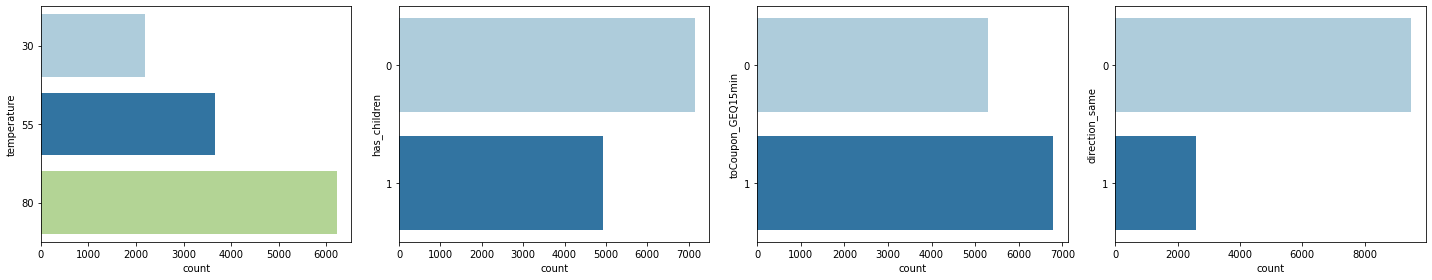

In [ ]:
print(f'Numeric data columns')

for i in  numeric.columns:
    print(i,": ",  numeric[i].unique())
print()
fig, axes = plt.subplots(1, 4, figsize=(20,4))
axes = axes.flatten()

for ax, col in zip(axes, numeric.columns):
    sns.countplot(y=col, data=numeric, ax=ax, 
                  palette=['#a6cee3','#1f78b4','#b2df8a'], );

plt.tight_layout()
plt.show()

However, some columns are norminal data. Hence, should be converted into object

In [ ]:
clean_df.has_children = clean_df.has_children.astype(str)
clean_df.direction_same = clean_df.direction_same.astype(str)

> Categorical Data

In [ ]:
category = clean_df.select_dtypes('object')
print(f'Categorical data: {category.shape[1]} columns')
category.head()

Categorical data: 19 columns


,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same
22,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0
23,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0
24,No Urgent Place,Friend(s),Sunny,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0
25,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0
26,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0


Categorical data columns:

destination :  ['No Urgent Place' 'Home' 'Work']

passanger :  ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather :  ['Sunny' 'Rainy' 'Snowy']

time :  ['2PM' '10AM' '6PM' '7AM' '10PM']

coupon :  ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']

expiration :  ['1d' '2h']

gender :  ['Male' 'Female']

age :  ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus :  ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']

has_children :  ['0' '1']

education :  ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation :  ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'P

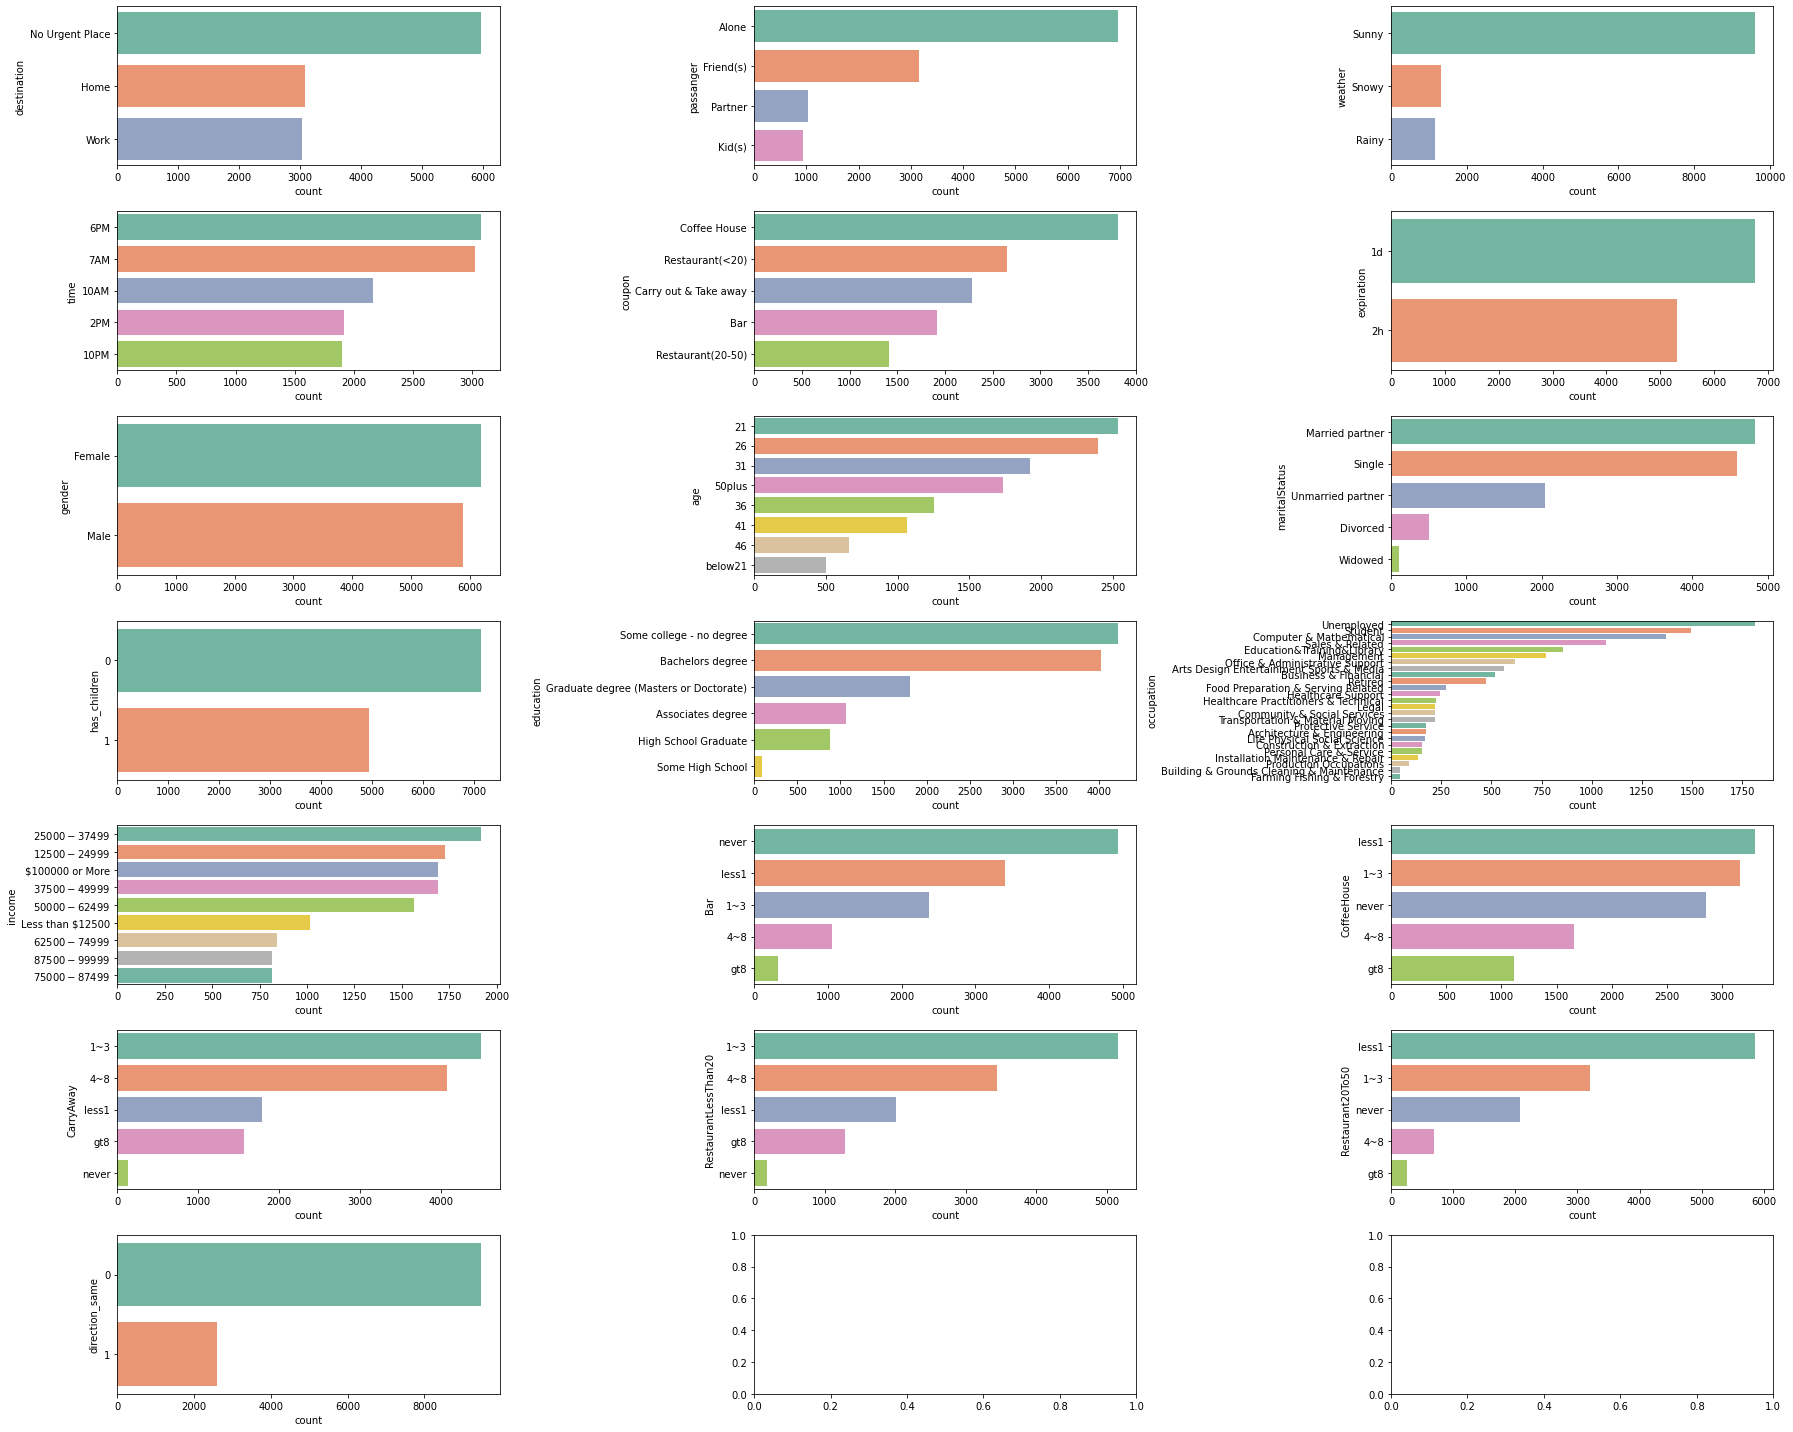

In [ ]:
print(f'Categorical data columns:')
for i in  category.columns:
    print()
    print(i,": ",  category[i].unique())
print()
fig, axes = plt.subplots(7, 3, figsize=(25,20))
axes = axes.flatten()
for ax, col in zip(axes, category.columns):
    sns.countplot(y=col, data=category, ax=ax, 
                  palette="Set2", order= category[col].value_counts().index );
plt.tight_layout()
plt.show()

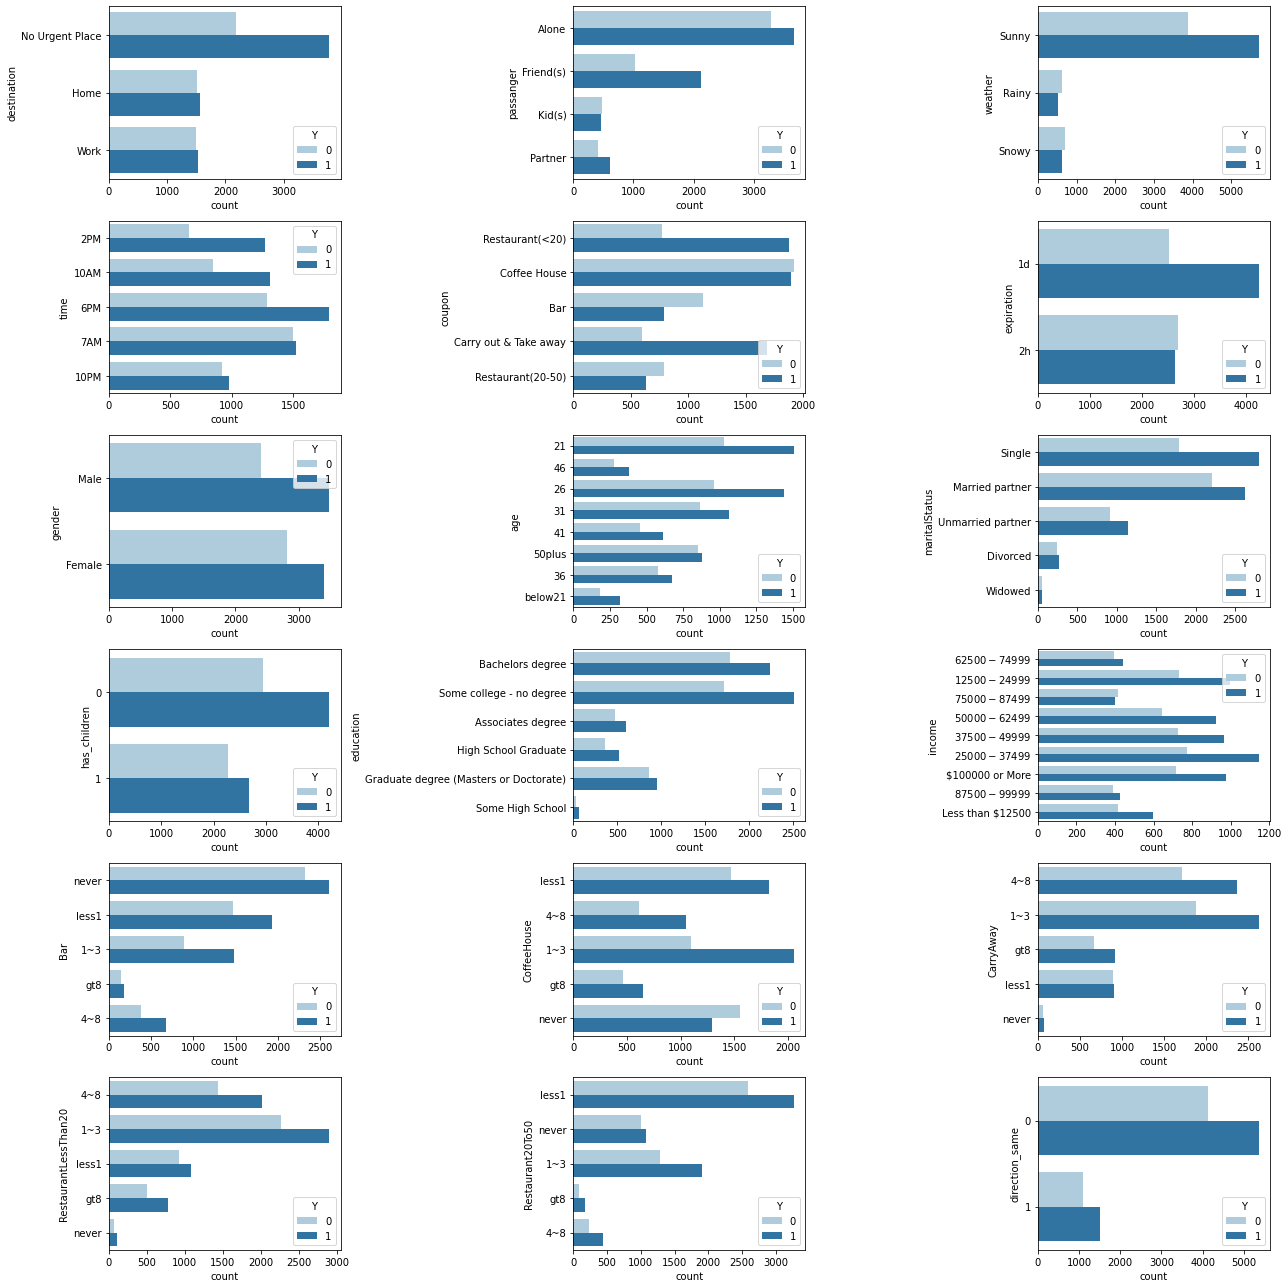

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten()

for ax, col in zip(axes,['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
#  'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'direction_same']):
    sns.countplot(y=col, hue='Y', data=clean_df, ax=ax, palette=['#a6cee3','#1f78b4'])
plt.tight_layout()
plt.show()

For those features which are ordinal must be converted to numeric in order to preserve the inner order.
<br> The followings are features to be treated as numerical data;
  - age
  - income
  - Bar
  - Restaurant20To50 -
  - RestaurantLessThan20 -
  - CarryAway
  - CoffeeHouse

In [ ]:
age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 
                  'CarryAway', 'CoffeeHouse', 'Bar']

for col in frequency_cols:
  clean_df[col] = clean_df[col].map(frequency_map)
clean_df.age = clean_df.age.map(age_map)
clean_df.income = clean_df.income.map(income_map)

In [ ]:
Numerical = clean_df.select_dtypes('int64')
print(f'Numerical data: {Numerical.shape[1]-1} columns')
Numerical.head()

Numerical data: 9 columns


,temperature,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,Y
22,55,1,5,0,1,3,3,1,0,1
23,80,1,5,0,1,3,3,1,0,0
24,80,1,5,0,1,3,3,1,0,1
25,80,1,5,0,1,3,3,1,1,0
26,80,1,5,0,1,3,3,1,0,0


>> Correlation on Numerical columns

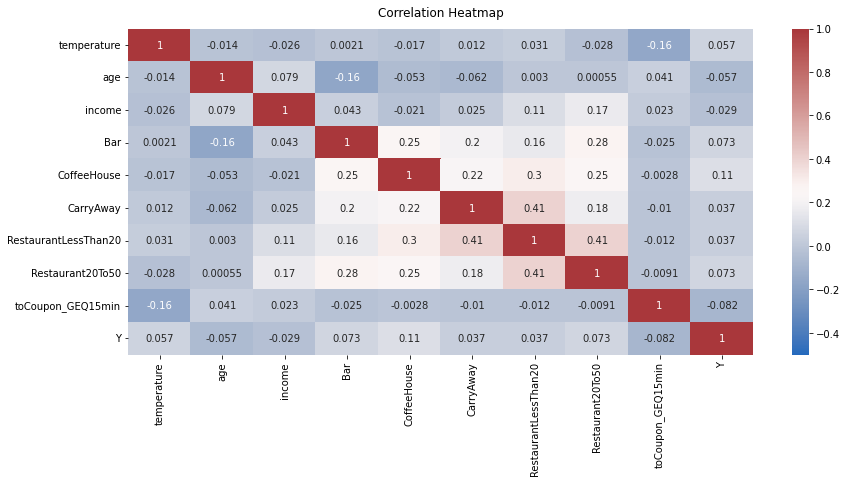

In [ ]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(clean_df.corr(), cmap='vlag', vmin=-0.5, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

There are correlations (>0.25) among those frequency columns: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50.

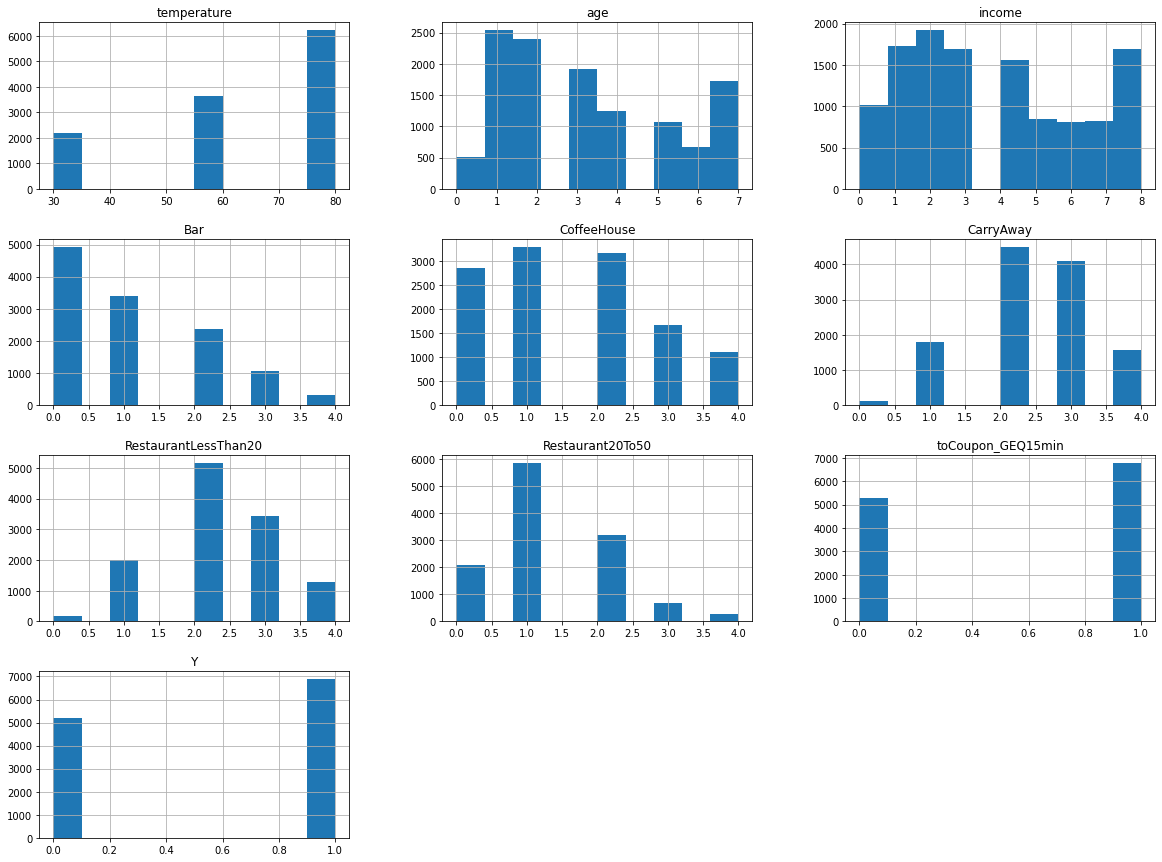

In [ ]:
clean_df.hist(figsize=(20, 15))
plt.show()

#**Step 4:** Data Transformation

Create X , y data

In [ ]:
X = clean_df.drop(columns=['Y'])
y = clean_df.Y

X.shape

(12079, 21)

Uses OneHotEncoder for all categorical features.

In [ ]:
num_features = X.select_dtypes(['int64', 'float64']).columns
cat_features = X.select_dtypes(['object']).columns


num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(12079, 73)

## KBest Selection

After try tuning hyperparameters, we decided not to select part of features but using all features.

In [ ]:
# Best_k = SelectKBest(f_classif,k=70).fit(X,y)
# params_lst = Best_k.get_feature_names_out()
# X = Best_k.transform(X)

##Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88, test_size=0.25)

In [ ]:
#print(params_lst)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(9059, 73)
(3020, 73)


#Traditional ML

The Traditional ML we picked are Logistic Regression, Support Vector Machine, K Nearest Neighbor and Random forest since they are fast to train.

In [ ]:
model_pipeline = []

model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(RandomForestClassifier())



# model_pipeline.append(DecisionTreeClassifier())
# model_pipeline.append(MLPClassifier())
# model_pipeline.append(GaussianNB())

In [ ]:
avg_list = ['macro','weighted']
trad_model = ['LogisticRegression ','SVM ','KNeighborsClassifier ','RandomForestClassifier ']

In [ ]:
models = pd.DataFrame(columns=["Model","Accuracy Score","Recall","Precision","F1"])

for n in range(len(model_pipeline)):
  model = model_pipeline[n]
  md = trad_model[n]
  for i in range(len(avg_list)):
    ct_start = datetime.datetime.now()
    model.fit(X_train,y_train)
    ct_end = datetime.datetime.now()
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = avg_list[i])
    model_name = md + avg_list[i]
    print(f'\nModel: {model_name}')
    print(f'Test Accuracy Score :{score:.4f}')
    print(f'Recall :{recall_precision_f1[0]:.4f}')
    print(f'Precision :{recall_precision_f1[1]:.4f}')
    print(f'F1 :{recall_precision_f1[2]:.4f}')
    print("runtime:-", ct_end - ct_start)
    new_row = {"Model": model_name, "Accuracy Score": score, "Recall":recall_precision_f1[0],"Precision":recall_precision_f1[1],"F1":recall_precision_f1[2]}
    models = models.append(new_row, ignore_index=True)


Model: LogisticRegression macro
Test Accuracy Score :0.6805
Recall :0.6786
Precision :0.6686
F1 :0.6695
runtime:- 0:00:00.198037

Model: LogisticRegression weighted
Test Accuracy Score :0.6805
Recall :0.6794
Precision :0.6805
F1 :0.6759
runtime:- 0:00:00.164231

Model: SVM macro
Test Accuracy Score :0.7444
Recall :0.7456
Precision :0.7344
F1 :0.7366
runtime:- 0:00:10.007501

Model: SVM weighted
Test Accuracy Score :0.7444
Recall :0.7450
Precision :0.7444
F1 :0.7414
runtime:- 0:00:10.479008

Model: KNeighborsClassifier macro
Test Accuracy Score :0.6785
Recall :0.6757
Precision :0.6678
F1 :0.6688
runtime:- 0:00:00.006642

Model: KNeighborsClassifier weighted
Test Accuracy Score :0.6785
Recall :0.6769
Precision :0.6785
F1 :0.6748
runtime:- 0:00:00.005199

Model: RandomForestClassifier macro
Test Accuracy Score :0.7546
Recall :0.7571
Precision :0.7443
F1 :0.7467
runtime:- 0:00:07.570152

Model: RandomForestClassifier weighted
Test Accuracy Score :0.7560
Recall :0.7580
Precision :0.7560
F1

In [ ]:
models.sort_values(by="F1", ascending=False)

,Model,Accuracy Score,Recall,Precision,F1
7,RandomForestClassifier weighted,0.755960,0.757966,0.755960,0.752512
6,RandomForestClassifier macro,0.754636,0.757106,0.744279,0.746747
3,SVM weighted,0.744371,0.745036,0.744371,0.741397
2,SVM macro,0.744371,0.745577,0.734360,0.736560
1,LogisticRegression weighted,0.680464,0.679375,0.680464,0.675891
5,KNeighborsClassifier weighted,0.678477,0.676941,0.678477,0.674815
0,LogisticRegression macro,0.680464,0.678609,0.668611,0.669461
4,KNeighborsClassifier macro,0.678477,0.675673,0.667816,0.668770


In [ ]:
print( f"x_train.shape={X_train.shape} , min(x_train)={np.min(X_train)} , max(x_train)={np.max(X_train)}" )
print( f"y_train.shape={y_train.shape} , y_train.dtype={y_train.dtype} , min(y_train)={np.min(y_train)} , max(y_train)={np.max(y_train)}" )
print( f"x_test.shape={X_test.shape} , x_test.dtype={X_test.dtype} , min(x_test)={np.min(X_test)} , max(x_test)={np.max(X_test)}" )
print( f"y_test.shape={y_test.shape} , y_test.dtype={y_test.dtype} , min(y_test)={np.min(y_test)} , max(y_test)={np.max(y_test)}" )

x_train.shape=(9059, 73) , min(x_train)=-2.608518223600908 , max(x_train)=3.077613800501769
y_train.shape=(9059,) , y_train.dtype=int64 , min(y_train)=0 , max(y_train)=1
x_test.shape=(3020, 73) , x_test.dtype=float64 , min(x_test)=-2.608518223600908 , max(x_test)=3.077613800501769
y_test.shape=(3020,) , y_test.dtype=int64 , min(y_test)=0 , max(y_test)=1


#MLP

**Hyperparameter Tuning**

In each round, team members select hyperparameter to tune model from the following parameters below:

*   Number of Hidden layer : min value = 3, max value = 5
*   Number of Units in Hidden layer : [32, 64, 128, 256, 512, 1024]
*   Activation function in Hidden layer : [relu, tanh, sigmoid]
*   Dropout : [none,0.2, 0.25, 0.3]
*   Learning rate : [0.001, 0.0001, 0.00001, 0.00025]
*   Activation function in Output layer : [softmax, sigmoid]
*   Loss function : BinaryCrossentropy
*   Optimizer : [Adam, Nadam, Adamax]
*   Batch size : [64, 128, 256, 512]

Re-train model with Hyperparameter and find model with highest accuracy, less loss and not over-fit

In [ ]:
model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(X_test.shape[1],)))

# Hidden layer
hd_act = 'tanh'

model.add( tf.keras.layers.Dense(32, activation=hd_act, name='hidden1') )   
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation=hd_act, name='hidden2') )
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )  
model.add( tf.keras.layers.Dense(128, activation=hd_act, name='hidden3') )
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn3') )  

model.add( tf.keras.layers.Dropout(0.25) )                     

# Output layer
model.add( tf.keras.layers.Dense(1, activation='sigmoid', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                2368      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 128)               8320      
                                                                 
 bn3 (BatchNormalization)    (None, 128)               512       
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , 
                       loss=tf.keras.losses.BinaryCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}_valacc{val_acc:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                save_weights_only=True,
                                                                monitor='val_acc',
                                                                mode='max',
                                                                save_best_only=True)

In [ ]:
X_train = pd.DataFrame(X_train.todense())
X_test = pd.DataFrame(X_test.todense())

In [ ]:
ct_start = datetime.datetime.now()
history = model.fit ( X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_split=0.25, callbacks=[model_checkpoint_callback] )
ct_end = datetime.datetime.now()

Epoch 1/200
54/54 [==============================] - 7s 11ms/step - loss: 0.8520 - acc: 0.5380 - val_loss: 0.6658 - val_acc: 0.5907
Epoch 2/200
54/54 [==============================] - 0s 7ms/step - loss: 0.7410 - acc: 0.5726 - val_loss: 0.6479 - val_acc: 0.6300
Epoch 3/200
54/54 [==============================] - 0s 7ms/step - loss: 0.7209 - acc: 0.5838 - val_loss: 0.6354 - val_acc: 0.6481
Epoch 4/200
54/54 [==============================] - 0s 6ms/step - loss: 0.7072 - acc: 0.5988 - val_loss: 0.6275 - val_acc: 0.6468
Epoch 5/200
54/54 [==============================] - 0s 7ms/step - loss: 0.6930 - acc: 0.6010 - val_loss: 0.6224 - val_acc: 0.6543
Epoch 6/200
54/54 [==============================] - 0s 7ms/step - loss: 0.6872 - acc: 0.6030 - val_loss: 0.6179 - val_acc: 0.6565
Epoch 7/200
54/54 [==============================] - 0s 7ms/step - loss: 0.6694 - acc: 0.6178 - val_loss: 0.6137 - val_acc: 0.6614
Epoch 8/200
54/54 [==============================] - 0s 7ms/step - loss: 0.6765 - 

In [ ]:
print('runtime:', ct_end - ct_start)

runtime: 0:02:23.813405


In [ ]:
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

total 3784
-rw-r--r-- 1 root root 85416 Sep  8 18:47 bestmodel_epoch199_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:47 bestmodel_epoch186_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch170_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch138_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch127_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch125_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch115_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch110_valloss0.54_valacc0.73.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch96_valloss0.55_valacc0.72.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch90_valloss0.55_valacc0.72.hdf5
-rw-r--r-- 1 root root 85416 Sep  8 18:46 bestmodel_epoch73_valloss0.55_valacc0.72.hdf5
-rw-r--r-- 1 

In [ ]:
# Check the keys in 'history'
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

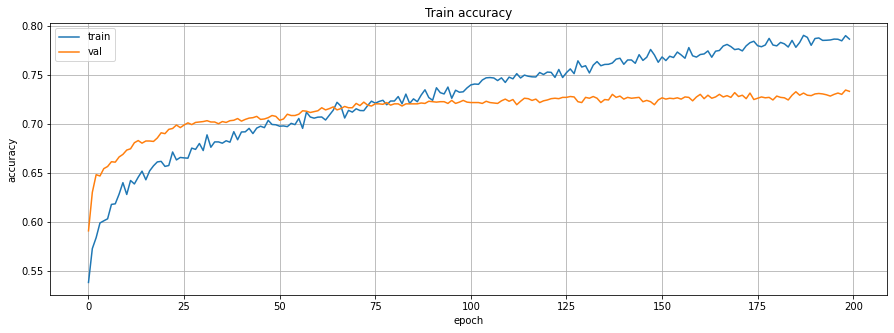

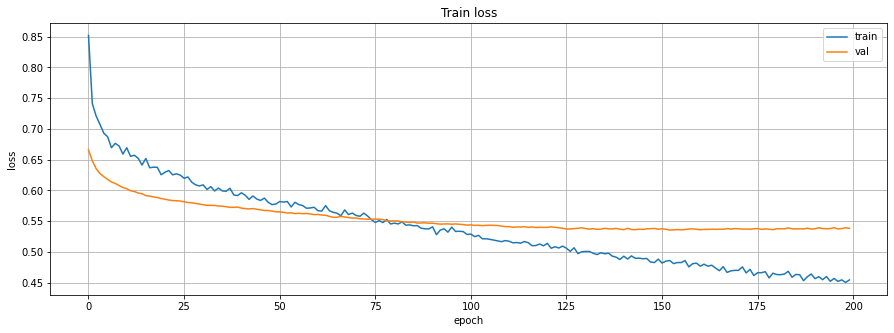

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=128)
print( f"{model.metrics_names} = {results}" )

24/24 [==============================] - 0s 3ms/step - loss: 0.5696 - acc: 0.7222
['loss', 'acc'] = [0.5696024298667908, 0.7221854329109192]
